In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.shape

(891, 12)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#possibilities of outliers in age and fare
df.describe(include=object).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [12]:
#Correlation for heatmap
corr_data=df.corr()

In [13]:
corr_data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

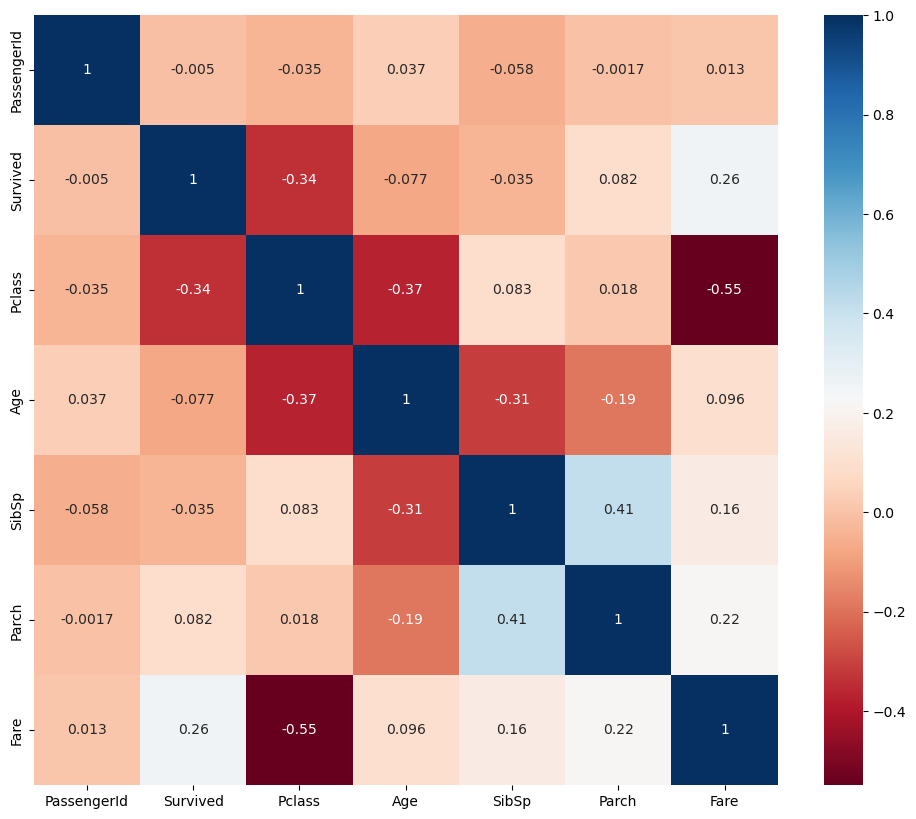

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_data,vmax=1,cmap='RdBu',annot=True)

<Axes: xlabel='Sex', ylabel='count'>

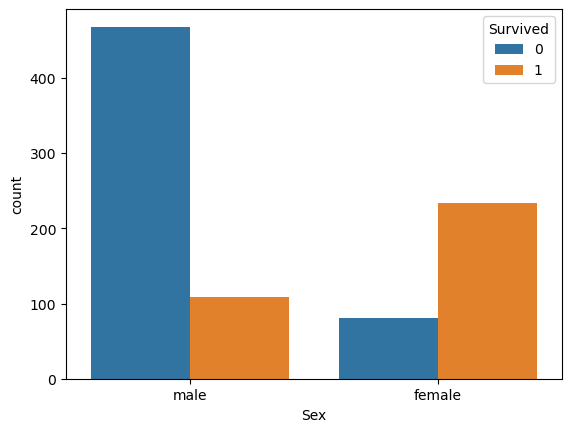

In [21]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

In [22]:
sexdata = df.groupby(by=['Sex','Survived'])['Survived'].count()

In [25]:
#Survival percentage of people on the basis of gender 
print('Females Survived %.2f%%'%((sexdata['female'][1]/(sexdata['female'][0]+sexdata['female'][1])*100)))
print('Males Survived %.2f%%'%((sexdata['male'][1]/(sexdata['male'][0]+sexdata['male'][1])*100)))

Females Survived 74.20%
Males Survived 18.89%


In [28]:
#Making a function for seperate data analysis for age groups
def agecategory(age):
    if age<=12:
        return'Children'
    elif age>12 and age<=19:
        return'Teenager'
    elif age>19 and age<=30:
        return 'Young'
    elif age>30 and age<=45:
        return 'Midage'
    elif age>45 and age<=60:
        return 'Oldies'
    else:
        return 'Senior Citizens'

In [29]:
#Adding this detail in main data
df['AgeCategory']=df['Age'].apply(agecategory)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Midage
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Midage


<Axes: xlabel='AgeCategory', ylabel='count'>

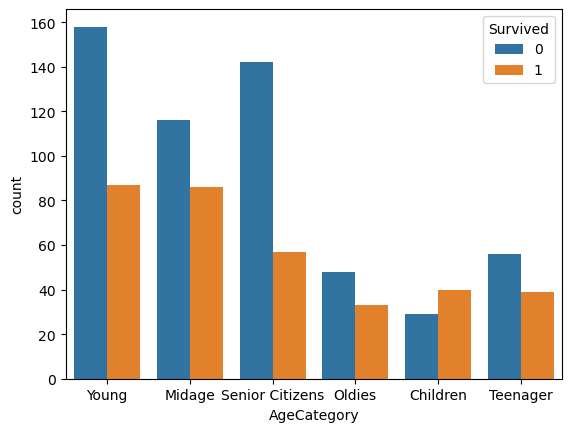

In [32]:
sns.countplot(x=df['AgeCategory'], hue=df['Survived'])

In [35]:
#We will calculate the survival dependancy on age category
relation = pd.crosstab(df['AgeCategory'],df['Survived'])


In [36]:
relation

Survived,0,1
AgeCategory,,
Children,29,40
Midage,116,86
Oldies,48,33
Senior Citizens,142,57
Teenager,56,39
Young,158,87


In [38]:
from scipy.stats import chi2_contingency

chi,p,dof,expected = chi2_contingency(relation)
print('Chi sq: ',chi)
print('p-value: ',p)
if p<0.05:
    print('Accept The H1:')#Accepting the association  
else:
    print('Accept the H0:')#Not accepting the association 

Chi sq:  22.007944184569013
p-value:  0.0005217807586673154
Accept The H1:


In [45]:
#Dependency of survival on fare price
fare1=df[df['Survived']==True]['Fare']
fare2=df[df['Survived']==False]['Fare']

In [46]:
from statsmodels.stats.weightstats import ztest


In [48]:
z_score,p_value = ztest(fare1,fare2)
print('z-score: ',z_score)
print('p-value: ',p_value)
if p_value<0.05:
    print('Accept The H1:')#no dependency both are diff
else:
    print('Accept the H0:')#dependent

z-score:  7.939191660871055
p-value:  2.035031103573989e-15
Accept The H1:


In [51]:
((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)


Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
AgeCategory     0.000000
dtype: float64

Theres a lot of null data present at cabin, age and embarked columns
Will go through each of them one by one 

In [52]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Senior Citizens


In [53]:
df.groupby(by=['Pclass','Embarked'])['Fare'].median()[1]

Embarked
C    78.2667
Q    90.0000
S    52.0000
Name: Fare, dtype: float64

calculating most embarked

In [54]:
#Filling the missing data of embarked by C because of above median calculation
df['Embarked']=np.where(df['Embarked'].isnull(),'C',df['Embarked'])

In [55]:
df.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,Senior Citizens


Checked if its filled or not...
Success.

In [62]:
#for cabin data as it is almost 80% null so we will remove it
df.drop(columns=['Cabin'],inplace=True)

In [63]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory


In [64]:
df['Age'].median()


28.0

In [65]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [66]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Midage
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Midage
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Teenager
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Senior Citizens
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Young


Will check again if still there is some null values


In [67]:
((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)


PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
AgeCategory    0.0
dtype: float64

In [68]:
df.drop(columns=['PassengerId','Pclass','Name','Ticket','AgeCategory'],inplace=True)

In [69]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,1,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,0,male,35.0,0,0,8.0500,S


In [70]:
df = pd.get_dummies(df, drop_first=True)

In [72]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


We will be Scaling the data now for model training


In [73]:
from sklearn.preprocessing import StandardScaler


In [75]:
dff = StandardScaler().fit_transform(df)

In [76]:
dff

array([[-0.78927234, -0.56573646,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [ 1.2669898 ,  0.66386103,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 1.2669898 , -0.25833709, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [-0.78927234, -0.1046374 ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [ 1.2669898 , -0.25833709, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [-0.78927234,  0.20276197, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

In [78]:
#same columns
pd.DataFrame(dff,columns=df.columns)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.789272,-0.565736,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,1.266990,0.663861,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,1.266990,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,1.266990,0.433312,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,-0.789272,0.433312,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.789272,-0.181487,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.619306
887,1.266990,-0.796286,-0.474545,-0.473674,-0.044381,-1.355574,-0.307562,0.619306
888,-0.789272,-0.104637,0.432793,2.008933,-0.176263,-1.355574,-0.307562,0.619306
889,1.266990,-0.258337,-0.474545,-0.473674,-0.044381,0.737695,-0.307562,-1.614710


# Spliting Train Test

In [79]:
from sklearn.model_selection import train_test_split

In [82]:
y=df['Survived']
x=df.drop(columns=['Survived']) #independent of survival


In [83]:
x

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,1
4,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1
887,19.0,0,0,30.0000,0,0,1
888,28.0,1,2,23.4500,0,0,1
889,26.0,0,0,30.0000,1,0,0


In [84]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [85]:
x_train,x_test, y_train,y_test = train_test_split(x,y,stratify=y,train_size=0.8,random_state=2)

In [87]:
print(x_train.shape,y_train.shape)


(712, 7) (712,)


In [88]:
print(x_test.shape,y_test.shape)

(179, 7) (179,)


# Logistic Regression 

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
reg =  LogisticRegression()

In [91]:
reg.fit(x_train,y_train)

LogisticRegression()

In [92]:
ypred = reg.predict(x_test)

In [93]:
ypred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [94]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [99]:
round(accuracy_score(y_test,ypred)*100,2)

78.77

In [100]:
classification_report(y_test,ypred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.85      0.83       110\n           1       0.75      0.68      0.71        69\n\n    accuracy                           0.79       179\n   macro avg       0.78      0.77      0.77       179\nweighted avg       0.79      0.79      0.79       179\n'

In [101]:
confusion_matrix(y_test,ypred)

array([[94, 16],
       [22, 47]], dtype=int64)

In [105]:
!pip install scikit-plot


In [109]:
import scikitplot as skplt


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

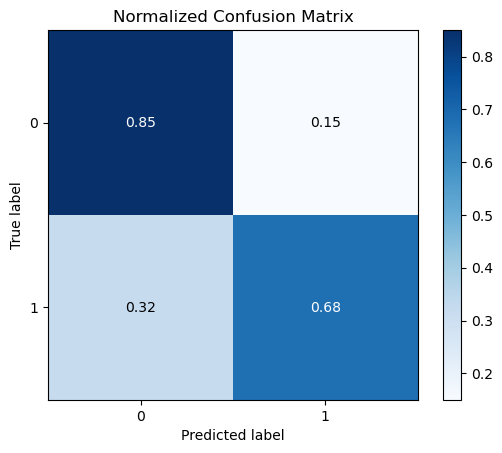

In [111]:
skplt.metrics.plot_confusion_matrix(y_test,ypred,normalize=True)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

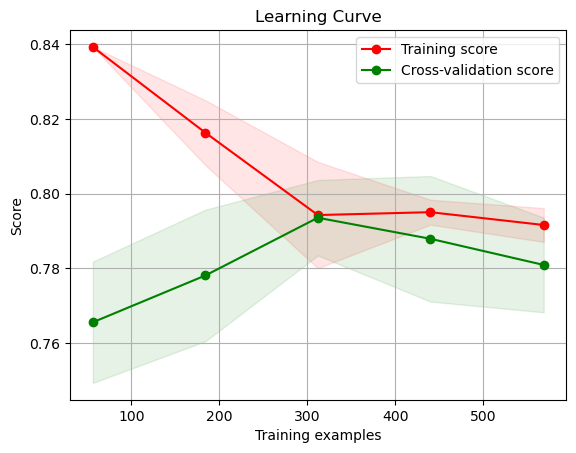

In [112]:
skplt.estimators.plot_learning_curve(reg,x_train,y_train)

# Random Forest(boosting)

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [118]:
rf= RandomForestClassifier()

In [119]:
parameters = {'n_estimators':[50,100,200,350],
    'criterion':['gini','entropy'],
        'max_features':[3,4,5]}

In [122]:
gridsearch = GridSearchCV(estimator=rf,
                   param_grid=parameters,
                   cv=3,
                   scoring='accuracy',
                   verbose=3)

In [123]:
gridsearch.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_features=3, n_estimators=50;, score=0.836 total time=   0.0s
[CV 2/3] END criterion=gini, max_features=3, n_estimators=50;, score=0.776 total time=   0.0s
[CV 3/3] END criterion=gini, max_features=3, n_estimators=50;, score=0.781 total time=   0.0s
[CV 1/3] END criterion=gini, max_features=3, n_estimators=100;, score=0.819 total time=   0.0s
[CV 2/3] END criterion=gini, max_features=3, n_estimators=100;, score=0.785 total time=   0.0s
[CV 3/3] END criterion=gini, max_features=3, n_estimators=100;, score=0.793 total time=   0.0s
[CV 1/3] END criterion=gini, max_features=3, n_estimators=200;, score=0.819 total time=   0.2s
[CV 2/3] END criterion=gini, max_features=3, n_estimators=200;, score=0.789 total time=   0.2s
[CV 3/3] END criterion=gini, max_features=3, n_estimators=200;, score=0.797 total time=   0.2s
[CV 1/3] END criterion=gini, max_features=3, n_estimators=350;, score=0.819 total time=

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [3, 4, 5],
                         'n_estimators': [50, 100, 200, 350]},
             scoring='accuracy', verbose=3)

In [124]:
gridsearch.best_score_

0.8061435544682007

In [125]:
#accessing best parameters
gridsearch.best_params_

{'criterion': 'gini', 'max_features': 5, 'n_estimators': 200}

In [126]:
rf=RandomForestClassifier(**gridsearch.best_params_)

In [127]:
#fitting it on traindata
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=200)

In [132]:
ypred=rf.predict(x_test)

In [133]:
ypred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [134]:
confusion_matrix(y_test,ypred)

array([[94, 16],
       [19, 50]], dtype=int64)

In [131]:
round(accuracy_score(y_test,ypred)*100,2)

80.45